In [9]:
%pylab inline
import csv
import json
import numpy as np
from collections import defaultdict, OrderedDict
import matplotlib.pyplot as plt
from scipy.stats import pearsonr,spearmanr,linregress
import math
import plotly.plotly as py
import pandas as pd
import plotly.graph_objs as go
import os

from yelphelpers_vmo5 import * #make sure this is in your directory!

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.chdir("/Users/veronicaosborn/Desktop/SENIORYEAR/yelp-spring17")
users=[]
with open('user.json') as json_file:
    for line in json_file:
        users.append(json.loads(line))

In [3]:
business=[]
with open('business.json') as json_file:
    for line in json_file:
        business.append(json.loads(line))

In [4]:
tip=[]
with open('tip.json') as json_file:
    for line in json_file:
        tip.append(json.loads(line))

In [5]:
#Getting list of possible years
yearspossible=set()
for eachuser in range(len(users)):
    year_began = users[eachuser][u'yelping_since'][0:4]
    yearspossible.add(year_began)
yearspossible = sorted(list(yearspossible))

In [10]:
pattern2009 = ElitePatternof4(u'2009', u'2010', users)
pattern2010 = ElitePatternof4(u'2010', u'2011', users)
pattern2011 = ElitePatternof4(u'2011', u'2012', users)
pattern2012 = ElitePatternof4(u'2012', u'2013', users)
pattern2013 = ElitePatternof4(u'2013', u'2014', users)
pattern2014 = ElitePatternof4(u'2014', u'2015', users)
pattern2015 = ElitePatternof4(u'2015', u'2016', users)
pattern2016 = ElitePatternof4(u'2016', u'2017', users)

In [11]:
#Get the counts for EN, EE, NE, NN for each year
print pattern2009
print pattern2010
print pattern2011
print pattern2012
print pattern2013
print pattern2014
print pattern2015
print pattern2016

[1118, 5392, 5004, 38190]
[2100, 8296, 4776, 34532]
[2619, 10453, 7119, 29513]
[2683, 14889, 4661, 27471]
[4508, 15042, 4983, 25171]
[3732, 16293, 8716, 20963]
[4182, 20827, 8019, 16676]
[6512, 22334, 294, 20564]


In [12]:
ENusercounts = [pattern2009[0],pattern2010[0],pattern2011[0],pattern2012[0],
                pattern2013[0],pattern2014[0],pattern2015[0],pattern2016[0]]
EEusercounts = [pattern2009[1],pattern2010[1],pattern2011[1],pattern2012[1],
                pattern2013[1],pattern2014[1],pattern2015[1],pattern2016[1]]
NEusercounts = [pattern2009[2],pattern2010[2],pattern2011[2],pattern2012[2],
                pattern2013[2],pattern2014[2],pattern2015[2],pattern2016[2]]
NNusercounts = [pattern2009[3],pattern2010[3],pattern2011[3],pattern2012[3],
                pattern2013[3],pattern2014[3],pattern2015[3],pattern2016[3]]

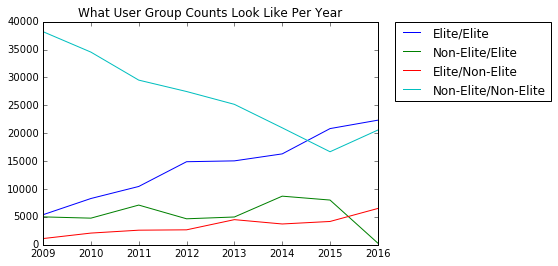

In [13]:
plt.title('What User Group Counts Look Like Per Year')
plt.plot(range(8), EEusercounts, label='Elite/Elite')
plt.plot(range(8), NEusercounts, label='Non-Elite/Elite')
plt.plot(range(8), ENusercounts, label='Elite/Non-Elite')
plt.plot(range(8), NNusercounts, label='Non-Elite/Non-Elite')
plt.xticks(range(8), yearspossible[5:13], rotation='horizontal')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [14]:
#Get the percentages for EN, EE, NE, NN for each year
print [round(i/1029432.,4) for i in pattern2009]
print [round(i/1029432.,4) for i in pattern2010]
print [round(i/1029432.,4) for i in pattern2011]
print [round(i/1029432.,4) for i in pattern2012]
print [round(i/1029432.,4) for i in pattern2013]
print [round(i/1029432.,4) for i in pattern2014]
print [round(i/1029432.,4) for i in pattern2015]
print [round(i/1029432.,4) for i in pattern2016]

[0.0011, 0.0052, 0.0049, 0.0371]
[0.002, 0.0081, 0.0046, 0.0335]
[0.0025, 0.0102, 0.0069, 0.0287]
[0.0026, 0.0145, 0.0045, 0.0267]
[0.0044, 0.0146, 0.0048, 0.0245]
[0.0036, 0.0158, 0.0085, 0.0204]
[0.0041, 0.0202, 0.0078, 0.0162]
[0.0063, 0.0217, 0.0003, 0.02]


In [15]:
#Get user ID lists for EN, EE, NE, NN for each year
userpattern09 = UserPatternList(u'2009', u'2010', users)
userpattern10 = UserPatternList(u'2010', u'2011', users)
userpattern11 = UserPatternList(u'2011', u'2012', users)
userpattern12 = UserPatternList(u'2012', u'2013', users)
userpattern13 = UserPatternList(u'2013', u'2014', users)
userpattern14 = UserPatternList(u'2014', u'2015', users)
userpattern15 = UserPatternList(u'2015', u'2016', users)
userpattern16 = UserPatternList(u'2016', u'2017', users)

In [3]:
#Next step: matching the tips from each year to the (EN, EE, NE, NN) users of that year
#NOTE: This will take a while to run each of these.

In [ ]:
tipyears = groupTipsbyYear(tip)

In [16]:
tipsEN09 = getTipElites(tipyears[5], userpattern09[0]) #2009
tipsEE09 = getTipElites(tipyears[5], userpattern09[1]) #2009
tipsNE09 = getTipElites(tipyears[5], userpattern09[2]) #2009
tipsNN09 = getTipElites(tipyears[5], userpattern09[3]) #2009

NameError: name 'tipyears' is not defined

In [ ]:
tipsEN10 = getTipElites(tipyears[6], userpattern10[0]) #2010
tipsEE10 = getTipElites(tipyears[6], userpattern10[1]) #2010
tipsNE10 = getTipElites(tipyears[6], userpattern10[2]) #2010
tipsNN10 = getTipElites(tipyears[6], userpattern10[3]) #2010

In [ ]:
tipsEN11 = getTipElites(tipyears[7], userpattern11[0]) #2011
tipsEE11 = getTipElites(tipyears[7], userpattern11[1]) #2011
tipsNE11 = getTipElites(tipyears[7], userpattern11[2]) #2011
tipsNN11 = getTipElites(tipyears[7], userpattern11[3]) #2011

In [ ]:
tipsEN12 = getTipElites(tipyears[8], userpattern12[0]) #2012
tipsEE12 = getTipElites(tipyears[8], userpattern12[1]) #2012
tipsNE12 = getTipElites(tipyears[8], userpattern12[2]) #2012
tipsNN12 = getTipElites(tipyears[8], userpattern12[3]) #2012

In [ ]:
tipsEN13 = getTipElites(tipyears[9], userpattern13[0]) #2013
tipsEE13 = getTipElites(tipyears[9], userpattern13[1]) #2013
tipsNE13 = getTipElites(tipyears[9], userpattern13[2]) #2013
tipsNN13 = getTipElites(tipyears[9], userpattern13[3]) #2013

In [ ]:
tipsEN14 = getTipElites(tipyears[10], userpattern14[0]) #2014
tipsEE14 = getTipElites(tipyears[10], userpattern14[1]) #2014
tipsNE14 = getTipElites(tipyears[10], userpattern14[2]) #2014
tipsNN14 = getTipElites(tipyears[10], userpattern14[3]) #2014

In [ ]:
tipsEN15 = getTipElites(tipyears[11], userpattern15[0]) #2015
tipsEE15 = getTipElites(tipyears[11], userpattern15[1]) #2015
tipsNE15 = getTipElites(tipyears[11], userpattern15[2]) #2015
tipsNN15 = getTipElites(tipyears[11], userpattern15[3]) #2015

In [ ]:
tipsEN16 = getTipElites(tipyears[12], userpattern16[0]) #2016
tipsEE16 = getTipElites(tipyears[12], userpattern16[1]) #2016
tipsNE16 = getTipElites(tipyears[12], userpattern16[2]) #2016
tipsNN16 = getTipElites(tipyears[12], userpattern16[3]) #2016

In [ ]:
#Get tip counts (i.e. length of user ID lists) for each of the individual groups: EN, EE, NE, NN 

tipsEEyears = ([0,0,0,0,0]+[len(tipsEE09), len(tipsEE10), len(tipsEE11), len(tipsEE12), len(tipsEE13), len(tipsEE14),
 len(tipsEE15), len(tipsEE16)])

tipsNEyears = ([0,0,0,0,0]+[len(tipsNE09), len(tipsNE10), len(tipsNE11), len(tipsNE12), len(tipsNE13), len(tipsNE14),
 len(tipsNE15), len(tipsNE16)])

tipsENyears = ([0,0,0,0,0]+[len(tipsEN09), len(tipsEN10), len(tipsEN11), len(tipsEN12), len(tipsEN13), len(tipsEN14),
 len(tipsEN15), len(tipsEN16)])

tipsNNyears = ([0,0,0,0,0]+[len(tipsNN09), len(tipsNN10), len(tipsNN11), len(tipsNN12), len(tipsNN13), len(tipsNN14),
 len(tipsNN15), len(tipsNN16)])

print tipsEEyears
print tipsNEyears
print tipsENyears
print tipsNNyears

In [ ]:
plt.title('What Total Tips Looks like for User Groups: EE, NE, EN, NN')
plt.plot(yearspossible[:13], tipsEEyears, label='Total tips for Elite/Elite Group')
plt.plot(yearspossible[:13], tipsNEyears, label='Total tips for Non-Elite/Elite Group')
plt.plot(yearspossible[:13], tipsENyears, label='Total tips from Elite/Non-Elite Group')
plt.plot(yearspossible[:13], tipsNNyears, label='Total tips from Non-Elite/Non-Elite Group')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
#What is the average tips-per-user for the four user groups?
tipsEN_TPU=([0,0,0,0,0]+[round(len(tipsEN09)/float(len(userpattern09[0])),4),
                round(len(tipsEN10)/float(len(userpattern10[0])),4),
                round(len(tipsEN11)/float(len(userpattern11[0])),4),
                round(len(tipsEN12)/float(len(userpattern12[0])),4),
                round(len(tipsEN13)/float(len(userpattern13[0])),4),
                round(len(tipsEN14)/float(len(userpattern14[0])),4),
                round(len(tipsEN15)/float(len(userpattern15[0])),4),
                round(len(tipsEN16)/float(len(userpattern16[0])),4)])

tipsEE_TPU=([0,0,0,0,0]+[round(len(tipsEE09)/float(len(userpattern09[1])),4),
                round(len(tipsEE10)/float(len(userpattern10[1])),4),
                round(len(tipsEE11)/float(len(userpattern11[1])),4),
                round(len(tipsEE12)/float(len(userpattern12[1])),4),
                round(len(tipsEE13)/float(len(userpattern13[1])),4),
                round(len(tipsEE14)/float(len(userpattern14[1])),4),
                round(len(tipsEE15)/float(len(userpattern15[1])),4),
                round(len(tipsEE16)/float(len(userpattern16[1])),4)])

tipsNE_TPU=([0,0,0,0,0]+[round(len(tipsNE09)/float(len(userpattern09[2])),4),
                round(len(tipsNE10)/float(len(userpattern10[2])),4),
                round(len(tipsNE11)/float(len(userpattern11[2])),4),
                round(len(tipsNE12)/float(len(userpattern12[2])),4),
                round(len(tipsNE13)/float(len(userpattern13[2])),4),
                round(len(tipsNE14)/float(len(userpattern14[2])),4),
                round(len(tipsNE15)/float(len(userpattern15[2])),4),
                round(len(tipsNE16)/float(len(userpattern16[2])),4)])

tipsNN_TPU=([0,0,0,0,0]+[round(len(tipsNN09)/float(len(userpattern09[3])),4),
                round(len(tipsNN10)/float(len(userpattern10[3])),4),
                round(len(tipsNN11)/float(len(userpattern11[3])),4),
                round(len(tipsNN12)/float(len(userpattern12[3])),4),
                round(len(tipsNN13)/float(len(userpattern13[3])),4),
                round(len(tipsNN14)/float(len(userpattern14[3])),4),
                round(len(tipsNN15)/float(len(userpattern15[3])),4),
                round(len(tipsNN16)/float(len(userpattern16[3])),4)])

print 'Elite/Non-Elite Tips-Per-User: ', tipsEN_TPU
print 'Elite/Elite Tips-Per-User: ', tipsEE_TPU
print 'Non-Elite/Elite Tips-Per-User: ', tipsNE_TPU
print 'Non-Elite/Non-Elite Tips-Per-User: ', tipsNN_TPU

In [ ]:
plt.title('What TPU Averages Looks like for User Groups: EE, NE, EN, NN')
plt.plot(yearspossible[:13], tipsEE_TPU, label='TPU for Elite/Elite Group')
plt.plot(yearspossible[:13], tipsNE_TPU, label='TPU for Non-Elite/Elite Group')
plt.plot(yearspossible[:13], tipsEN_TPU, label='TPU from Elite/Non-Elite Group')
plt.plot(yearspossible[:13], tipsNN_TPU, label='TPU from Non-Elite/Non-Elite Group')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
#Combine the results of the matching tips to user groups for each user group.
allEEtips = [tipsEE09, tipsEE10, tipsEE11, tipsEE12, tipsEE13, tipsEE14, tipsEE15, tipsEE16]
allENtips = [tipsEN09, tipsEN10, tipsEN11, tipsEN12, tipsEN13, tipsEN14, tipsEN15, tipsEN16]
allNEtips = [tipsNE09, tipsNE10, tipsNE11, tipsNE12, tipsNE13, tipsNE14, tipsNE15, tipsNE16]
allNNtips = [tipsNN09, tipsNN10, tipsNN11, tipsNN12, tipsNN13, tipsNN14, tipsNN15, tipsNN16]

In [ ]:
#Get the number of tips that each user gave (in dictionary form):

In [ ]:
EEx = getAllUniqueCounts(allEEtips)

In [ ]:
ENx = getAllUniqueCounts(allENtips)

In [ ]:
NEx = getAllUniqueCounts(allNEtips)

In [ ]:
NNx = getAllUniqueCounts(allNNtips)

In [ ]:
#Look at the distribution of users that only gave 1 tip per year, 2 tips per year, ..., 5 tips per year.
#For the individual user groups: EE, NE, EN
EEonetimers = [0,0,0,0,0]+getParticularCount(EEx, 1)
EEtwotimers = [0,0,0,0,0]+getParticularCount(EEx, 2)
EEthreetimers = [0,0,0,0,0]+getParticularCount(EEx, 3)
EEfourtimers = [0,0,0,0,0]+getParticularCount(EEx, 4)
EEfivetimers = [0,0,0,0,0]+getParticularCount(EEx, 5)

NEonetimers = [0,0,0,0,0]+getParticularCount(NEx, 1)
NEtwotimers = [0,0,0,0,0]+getParticularCount(NEx, 2)
NEthreetimers = [0,0,0,0,0]+getParticularCount(NEx, 3)
NEfourtimers = [0,0,0,0,0]+getParticularCount(NEx, 4)
NEfivetimers = [0,0,0,0,0]+getParticularCount(NEx, 5)

ENonetimers = [0,0,0,0,0]+getParticularCount(ENx, 1)
ENtwotimers = [0,0,0,0,0]+getParticularCount(ENx, 2)
ENthreetimers = [0,0,0,0,0]+getParticularCount(ENx, 3)
ENfourtimers = [0,0,0,0,0]+getParticularCount(ENx, 4)
ENfivetimers = [0,0,0,0,0]+getParticularCount(ENx, 5)

NNonetimers = [0,0,0,0,0]+getParticularCount(NNx, 1)
NNtwotimers = [0,0,0,0,0]+getParticularCount(NNx, 2)
NNthreetimers = [0,0,0,0,0]+getParticularCount(NNx, 3)
NNfourtimers = [0,0,0,0,0]+getParticularCount(NNx, 4)
NNfivetimers = [0,0,0,0,0]+getParticularCount(NNx, 5)

In [ ]:
#SCATTERPLOTS of x number of tips per year for the different user groups.
plt.scatter(yearspossible[:13], EEonetimers, color='#2E86C1', label='1x tip-givers')
plt.scatter(yearspossible[:13], EEtwotimers, color='#F39C12', label='2x tip-givers')
plt.scatter(yearspossible[:13], EEthreetimers, color='#E74C3C', label='3x tip-givers')
plt.scatter(yearspossible[:13], EEfourtimers, color='#17A589', label='4x tip-givers')
plt.scatter(yearspossible[:13], EEfivetimers, color='#FFC300', label='5x tip-givers')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Count of Elite/Elite Users Giving # of Tips each Year')
plt.ylim(-50, 2000)
plt.show()

plt.scatter(yearspossible[:13], ENonetimers, color='#2E86C1', label='1x tip-givers')
plt.scatter(yearspossible[:13], ENtwotimers, color='#F39C12', label='2x tip-givers')
plt.scatter(yearspossible[:13], ENthreetimers, color='#E74C3C', label='3x tip-givers')
plt.scatter(yearspossible[:13], ENfourtimers, color='#17A589', label='4x tip-givers')
plt.scatter(yearspossible[:13], ENfivetimers, color='#FFC300', label='5x tip-givers')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Count of Elite/Non-Elite Users Giving # of Tips each Year')
plt.ylim(-50, 500)
plt.show()

plt.scatter(yearspossible[:13], NEonetimers, color='#2E86C1', label='1x tip-givers')
plt.scatter(yearspossible[:13], NEtwotimers, color='#F39C12', label='2x tip-givers')
plt.scatter(yearspossible[:13], NEthreetimers, color='#E74C3C', label='3x tip-givers')
plt.scatter(yearspossible[:13], NEfourtimers, color='#17A589', label='4x tip-givers')
plt.scatter(yearspossible[:13], NEfivetimers, color='#FFC300', label='5x tip-givers')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Count of Non-Elite/Elite Users Giving # of Tips each Year')
plt.ylim(-50, 500)
plt.show()

plt.scatter(yearspossible[:13], NNonetimers, color='#2E86C1', label='1x tip-givers')
plt.scatter(yearspossible[:13], NNtwotimers, color='#F39C12', label='2x tip-givers')
plt.scatter(yearspossible[:13], NNthreetimers, color='#E74C3C', label='3x tip-givers')
plt.scatter(yearspossible[:13], NNfourtimers, color='#17A589', label='4x tip-givers')
plt.scatter(yearspossible[:13], NNfivetimers, color='#FFC300', label='5x tip-givers')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Count of Non-Elite/Non-Elite Users Giving # of Tips each Year')
plt.ylim(-50, 500)
plt.show()

In [ ]:
EEtipcounts=[]
for year in yearspossible:
    countvals=[]
    for k in EEx[year].keys():
        countvals.append(EEx[year][k])
    EEtipcounts.append(countvals)
    
ENtipcounts=[]
for year in yearspossible:
    countvals=[]
    for k in ENx[year].keys():
        countvals.append(ENx[year][k])
    ENtipcounts.append(countvals)
    
NEtipcounts=[]
for year in yearspossible:
    countvals=[]
    for k in NEx[year].keys():
        countvals.append(NEx[year][k])
    NEtipcounts.append(countvals)
    
NNtipcounts=[]
for year in yearspossible:
    countvals=[]
    for k in NNx[year].keys():
        countvals.append(NNx[year][k])
    NNtipcounts.append(countvals)

In [ ]:
#BOXPLOTS of number of tips per year for the different user groups.
plt.figure(figsize=(8,6))
plt.title('Distribution of Tips Given per Elite/Elite User per Year')
plt.boxplot(EEtipcounts[5:])
plt.show()

plt.figure(figsize=(8,6))
plt.title('Distribution of Tips Given per Elite/Non-Elite User per Year')
plt.boxplot(ENtipcounts[5:])
plt.show()

plt.figure(figsize=(8,6))
plt.title('Distribution of Elite Tips Given per Non-Elite/Elite User per Year')
plt.boxplot(NEtipcounts[5:])
plt.show()

plt.figure(figsize=(8,6))
plt.title('Distribution of Elite Tips Given per Non-Elite/Non-Elite User per Year')
plt.boxplot(NNtipcounts[5:])
plt.show()